In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 전처리

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/공모전/tmp/processed_data_2.csv', encoding='euc-kr')

In [ ]:
data.head()

,Unnamed: 0,nickname,score,review,stay_date,sentimental_score_negative,sentimental_score_positive,topic_score_#0,topic_score_#1,topic_score_#2,topic_score_#3,topic_score_#4,topic_score_#5,topic_score_#6,topic_score_#7,topic_score_#8,topic_score_#9,topic_score_#0_negative,topic_score_#1_negative,topic_score_#2_negative,topic_score_#3_negative,topic_score_#4_negative,topic_score_#5_negative,topic_score_#6_negative,topic_score_#7_negative,topic_score_#8_negative,topic_score_#9_negative,topic_score_#0_positive,topic_score_#1_positive,topic_score_#2_positive,topic_score_#3_positive,topic_score_#4_positive,topic_score_#5_positive,topic_score_#6_positive,topic_score_#7_positive,topic_score_#8_positive,topic_score_#9_positive
0,0,karolinernes,50,이그제큐티브 라운지 칵테일 뷔페는 생각보다 넘 별로였어요 메뉴가 얼마 없어서 ifc...,2021-07-01,-1.531325,1.986892,0.040136,0.018102,0.019667,0.019184,0.027537,0.015008,0.035195,0.782721,0.019376,0.023074,-0.061462,-0.027720,-0.030117,-0.029377,-0.042168,-0.022981,-0.053895,-1.198599,-0.029670,-0.035334,0.079746,0.035967,0.039077,0.038117,0.054713,0.029818,0.069929,1.555181,0.038497,0.045845
1,1,mikyung782021,50,직원분들 모두들 너무 친전하셨고 말하지 않아도 무엇이 필요한지 먼저 오퍼해 주셨어요...,2021-07-01,-2.686230,3.260286,0.071453,0.008632,0.218631,0.323026,0.013132,0.007157,0.069096,0.007066,0.009240,0.272568,-0.191938,-0.023189,-0.587292,-0.867723,-0.035275,-0.019224,-0.185609,-0.018981,-0.024820,-0.732180,0.232956,0.028144,0.712798,1.053158,0.042813,0.023333,0.225274,0.023037,0.030124,0.888650
2,2,shinobu2,20,가격대비 메리크가 없으며 이제는 가격을 어느정도 지불해야지만 앞의 조망을 즐길수 있...,2021-07-01,1.622923,-1.981798,0.045082,0.020333,0.022091,0.021548,0.154148,0.016857,0.039532,0.016643,0.637850,0.025917,0.073164,0.032998,0.035852,0.034971,0.250170,0.027357,0.064157,0.027010,1.035182,0.042061,-0.089343,-0.040295,-0.043780,-0.042704,-0.305489,-0.033407,-0.078344,-0.032983,-1.264091,-0.051362
3,3,sharpgoodman,50,가족들과 즐거운 여름 휴가를 보낼 수 있었습니다 더운 여름이었지만 11시쯤 걸어다닌...,2021-07-01,-3.021251,3.449478,0.088896,0.526034,0.043561,0.042491,0.060990,0.033240,0.077952,0.032818,0.042914,0.051105,-0.268576,-1.589281,-0.131607,-0.128375,-0.184268,-0.100425,-0.235512,-0.099151,-0.129654,-0.154402,0.306644,1.814544,0.150261,0.146570,0.210385,0.114659,0.268893,0.113204,0.148031,0.176287
4,4,sunkeem,50,위치 주차 시설 서비스 등 호텔이 제공해야 할 모든면이 편리하고 좋았다 자녀들과 함...,2021-07-01,-2.996761,3.426380,0.071519,0.032256,0.035046,0.425136,0.049068,0.026742,0.062714,0.026403,0.230001,0.041116,-0.214325,-0.096664,-0.105023,-1.274030,-0.147046,-0.080139,-0.187939,-0.079123,-0.689258,-0.123213,0.245051,0.110522,0.120079,1.456677,0.168127,0.091628,0.214882,0.090466,0.788070,0.140877


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3564 non-null   int64  
 1   nickname                    3564 non-null   object 
 2   score                       3564 non-null   int64  
 3   review                      3564 non-null   object 
 4   stay_date                   3564 non-null   object 
 5   sentimental_score_negative  3564 non-null   float64
 6   sentimental_score_positive  3564 non-null   float64
 7   topic_score_#0              3564 non-null   float64
 8   topic_score_#1              3564 non-null   float64
 9   topic_score_#2              3564 non-null   float64
 10  topic_score_#3              3564 non-null   float64
 11  topic_score_#4              3564 non-null   float64
 12  topic_score_#5              3564 non-null   float64
 13  topic_score_#6              3564 

In [ ]:
df = data.iloc[:,1:17]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nickname                    3564 non-null   object 
 1   score                       3564 non-null   int64  
 2   review                      3564 non-null   object 
 3   stay_date                   3564 non-null   object 
 4   sentimental_score_negative  3564 non-null   float64
 5   sentimental_score_positive  3564 non-null   float64
 6   topic_score_#0              3564 non-null   float64
 7   topic_score_#1              3564 non-null   float64
 8   topic_score_#2              3564 non-null   float64
 9   topic_score_#3              3564 non-null   float64
 10  topic_score_#4              3564 non-null   float64
 11  topic_score_#5              3564 non-null   float64
 12  topic_score_#6              3564 non-null   float64
 13  topic_score_#7              3564 

In [ ]:
import numpy as np

In [ ]:
df['topic_label'] = df.apply(lambda x: np.argmax(x[6:]), axis=1)

In [ ]:
df['topic_label'].value_counts()

0    935
6    528
2    366
9    353
4    350
3    327
1    215
5    191
7    157
8    142
Name: topic_label, dtype: int64

### positive

In [ ]:
df_0 = df[df['topic_label'] == 0]
df_1 = df[df['topic_label'] == 1]
df_2 = df[df['topic_label'] == 2]
df_3 = df[df['topic_label'] == 3]
df_4 = df[df['topic_label'] == 4]
df_5 = df[df['topic_label'] == 5]
df_6 = df[df['topic_label'] == 6]
df_7 = df[df['topic_label'] == 7]
df_8 = df[df['topic_label'] == 8]
df_9 = df[df['topic_label'] == 9]

In [ ]:
df_0 = df_0.pivot_table(index='stay_date', aggfunc='median')
df_1 = df_1.pivot_table(index='stay_date', aggfunc='median')
df_2 = df_2.pivot_table(index='stay_date', aggfunc='median')
df_3 = df_3.pivot_table(index='stay_date', aggfunc='median')
df_4 = df_4.pivot_table(index='stay_date', aggfunc='median')
df_5 = df_5.pivot_table(index='stay_date', aggfunc='median')
df_6 = df_6.pivot_table(index='stay_date', aggfunc='median')
df_7 = df_7.pivot_table(index='stay_date', aggfunc='median')
df_8 = df_8.pivot_table(index='stay_date', aggfunc='median')
df_9 = df_9.pivot_table(index='stay_date', aggfunc='median')

In [ ]:
df_0 = df_0.reset_index()
df_1 = df_1.reset_index()
df_2 = df_2.reset_index()
df_3 = df_3.reset_index()
df_4 = df_4.reset_index()
df_5 = df_5.reset_index()
df_6 = df_6.reset_index()
df_7 = df_7.reset_index()
df_8 = df_8.reset_index()
df_9 = df_9.reset_index()

In [ ]:
def pred(df, sentiment):
    model = Prophet(changepoint_prior_scale=10, 
                changepoints=['2020-02-01'], 
                yearly_seasonality=10, 
                weekly_seasonality=False, 
                daily_seasonality=False, 
                growth='linear')
    model.add_country_holidays(country_name='KR')
    df_reg = df[['stay_date',f'sentimental_score_{sentiment}']].rename(columns = {'stay_date':'ds', f'sentimental_score_{sentiment}': 'y'})
    model.fit(df_reg)
    future = model.make_future_dataframe(periods=0, freq='M')
    forecast = model.predict(future)
    fig1 = model.plot(forecast)
    fig2 = model.plot_components(forecast)


In [ ]:
from fbprophet import Prophet

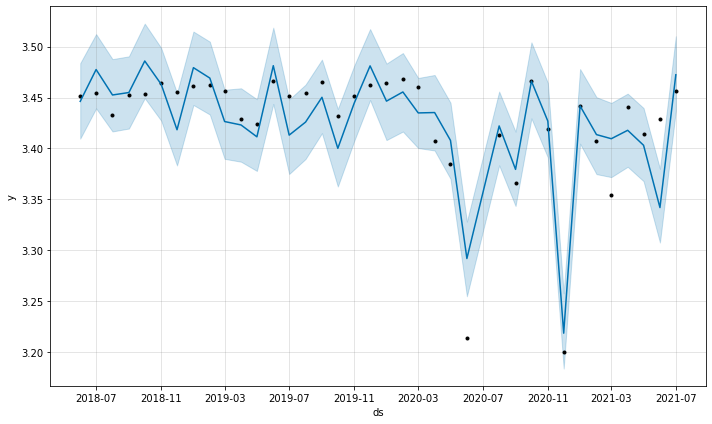

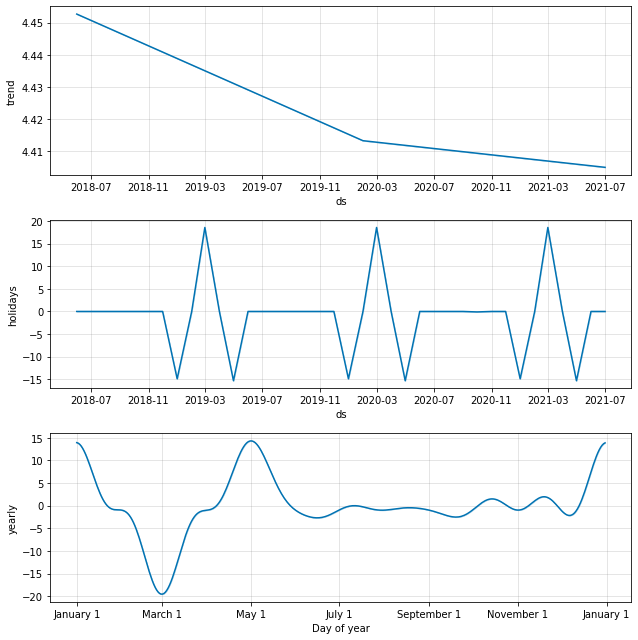

In [ ]:
pred(df_0, 'positive')

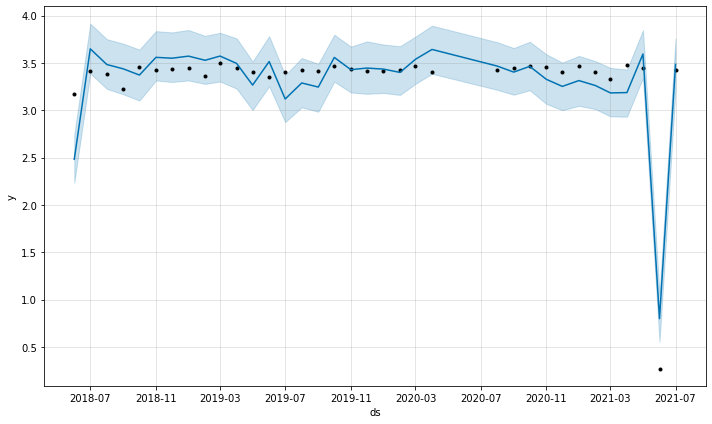

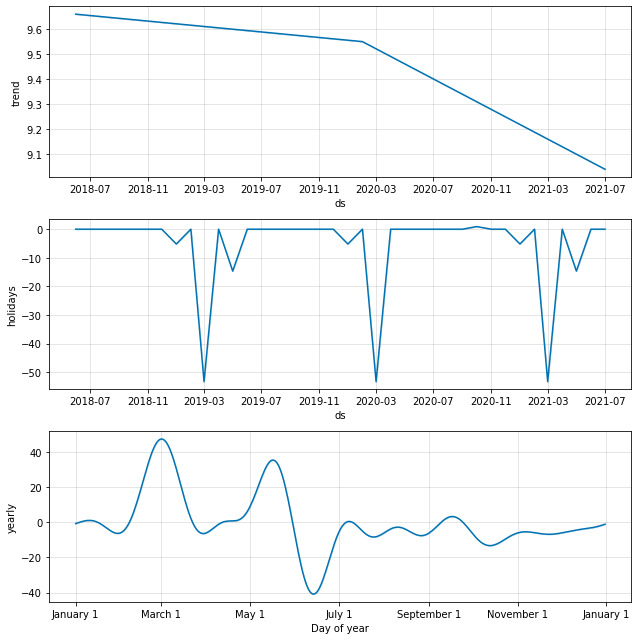

In [ ]:
pred(df_1, 'positive')

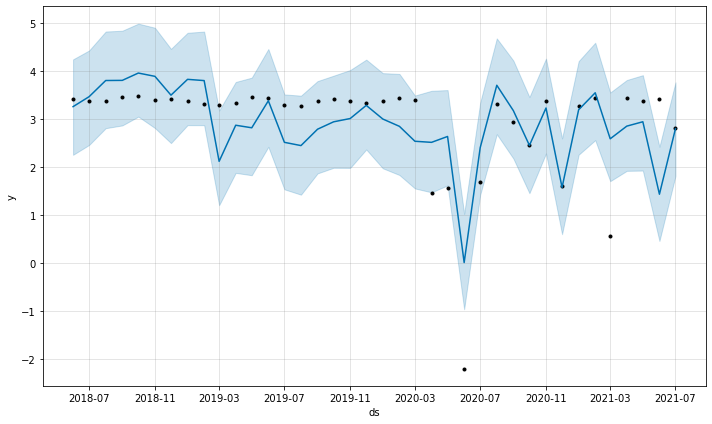

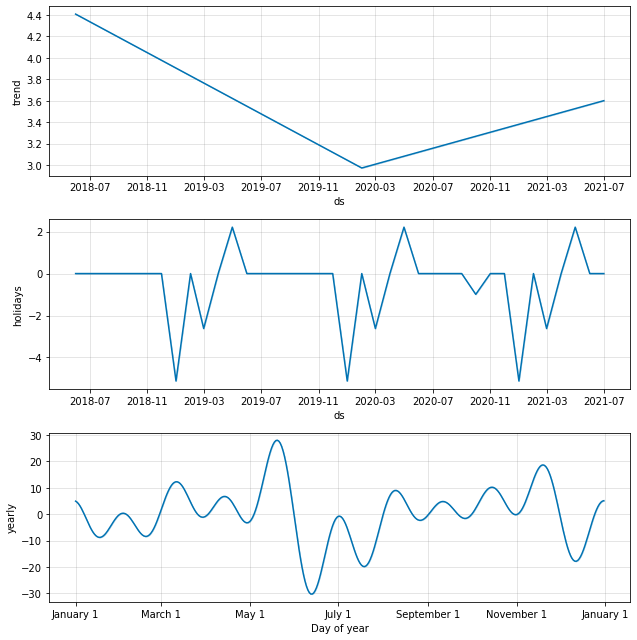

In [ ]:
pred(df_2, 'positive')

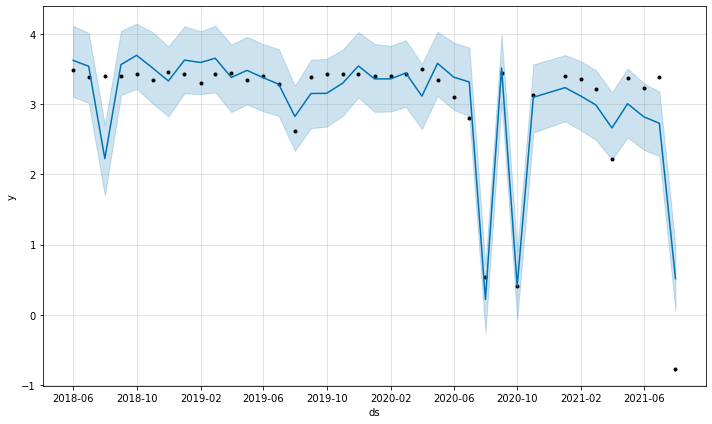

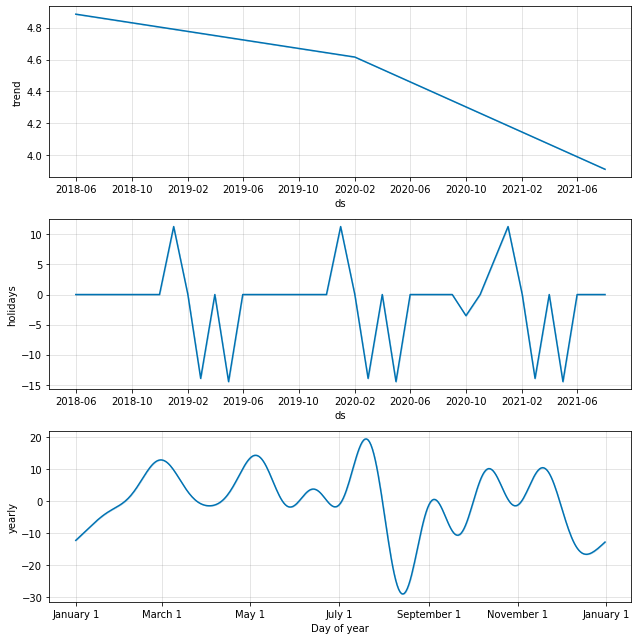

In [ ]:
pred(df_3, 'positive')

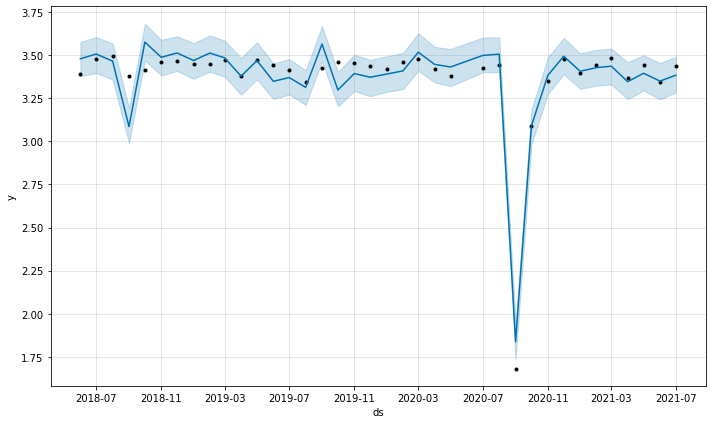

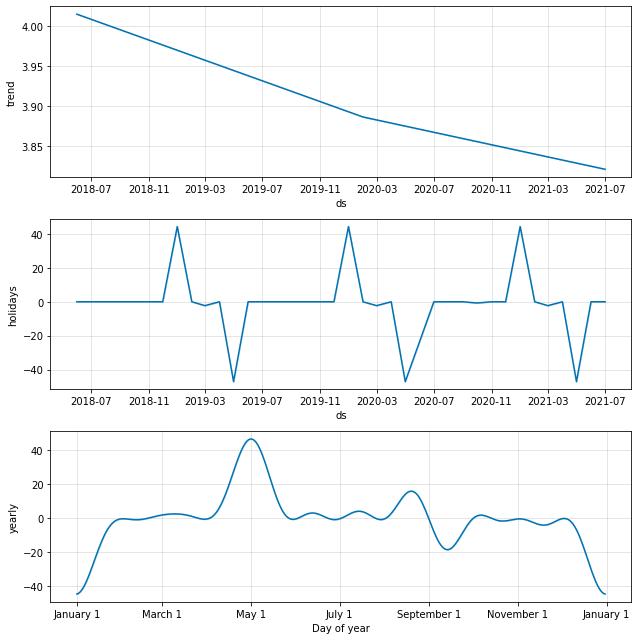

In [ ]:
pred(df_4, 'positive')

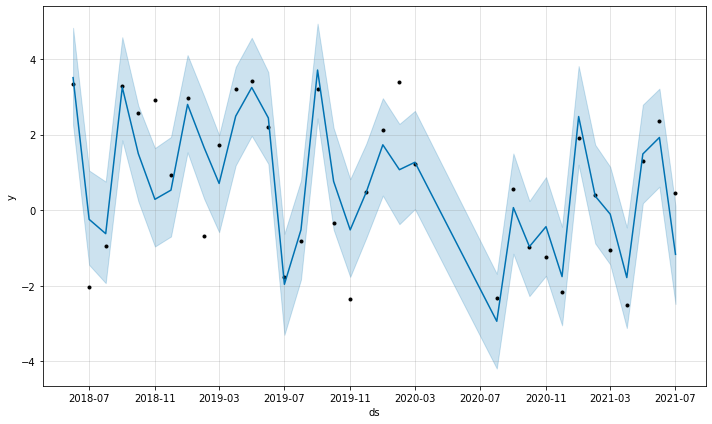

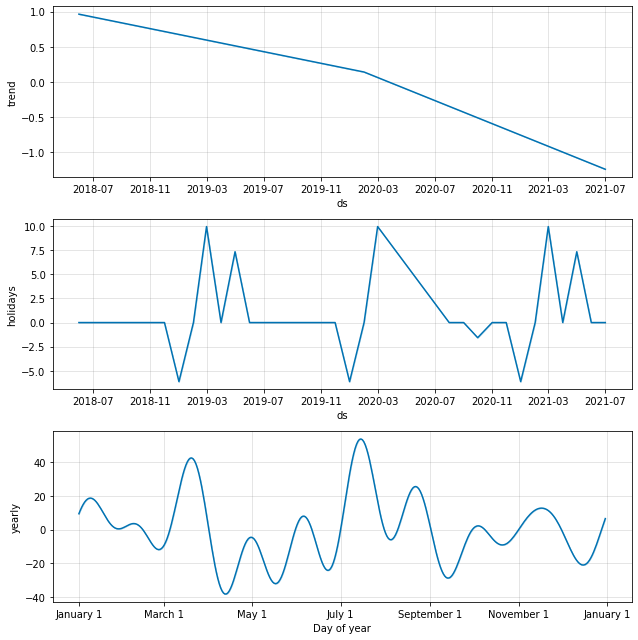

In [ ]:
pred(df_5, 'positive')

크게 변화

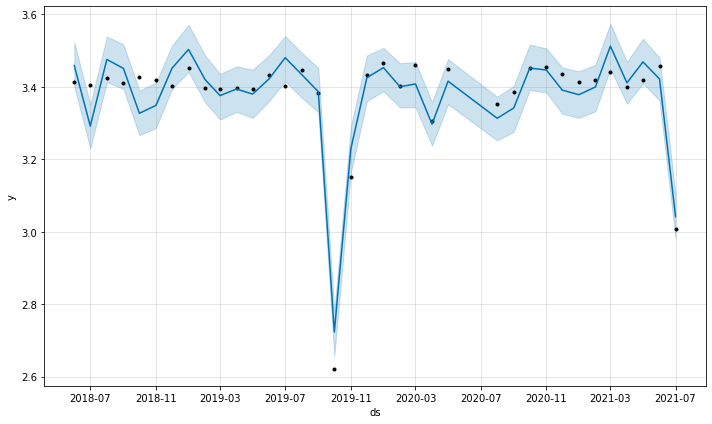

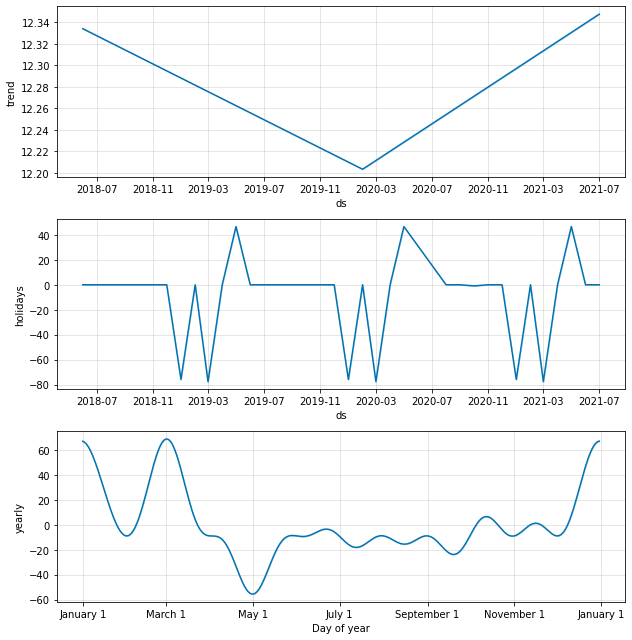

In [ ]:
pred(df_6, 'positive')

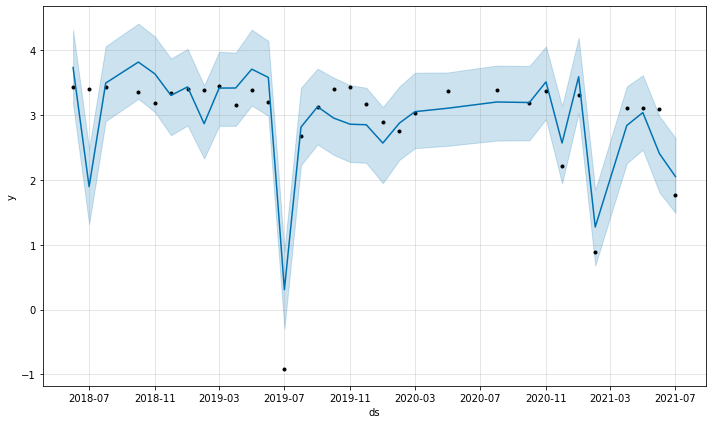

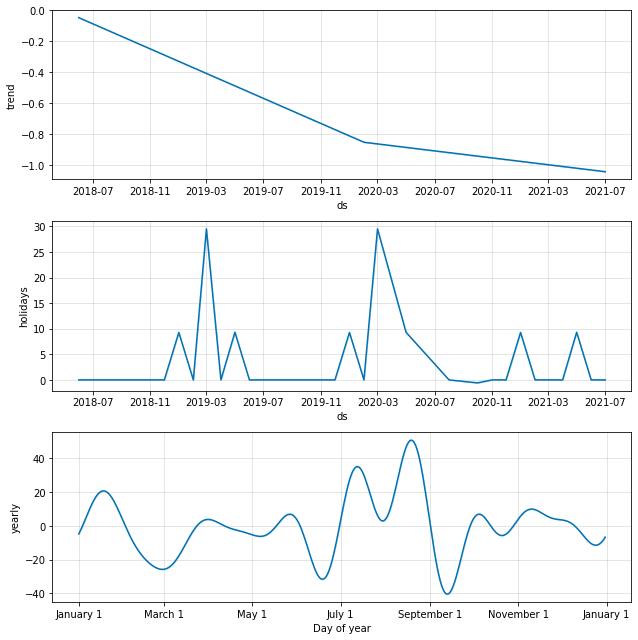

In [ ]:
pred(df_7, 'positive')

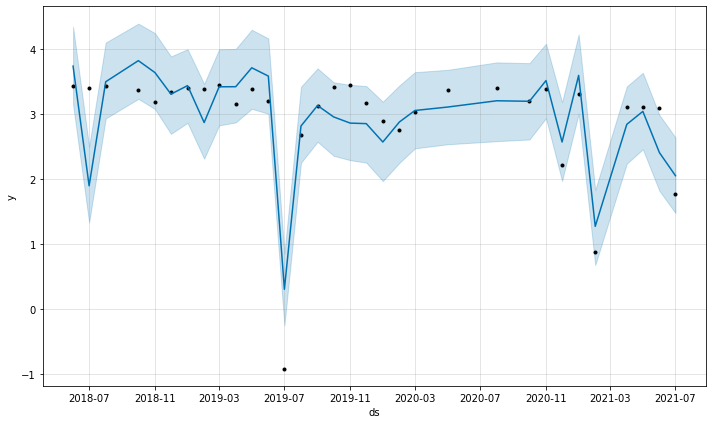

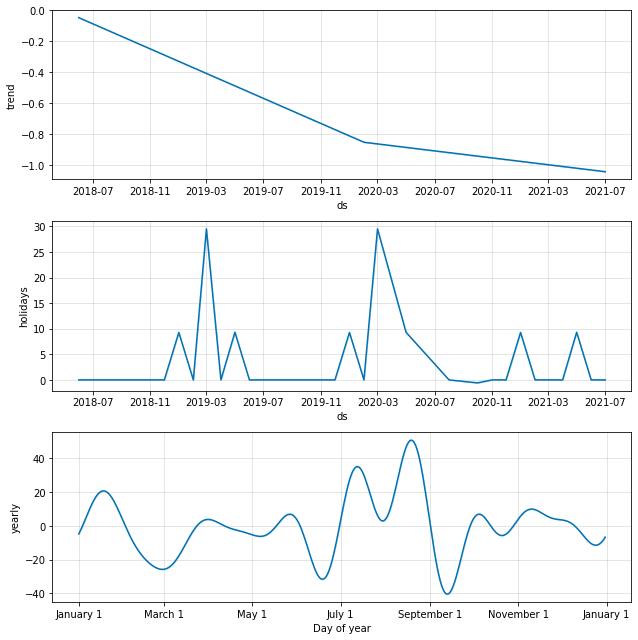

In [ ]:
pred(df_7, 'positive')

도시락 키워드 분석?

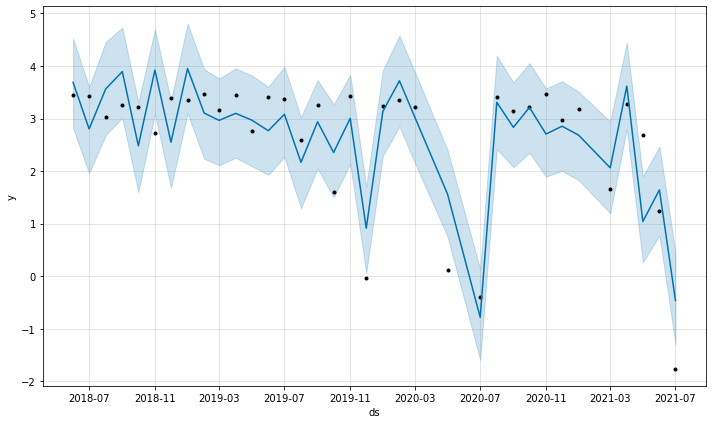

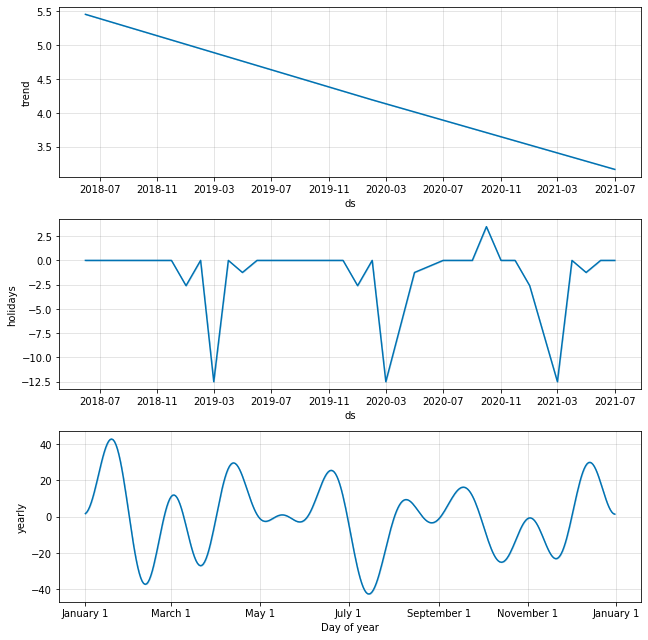

In [ ]:
pred(df_8, 'positive')

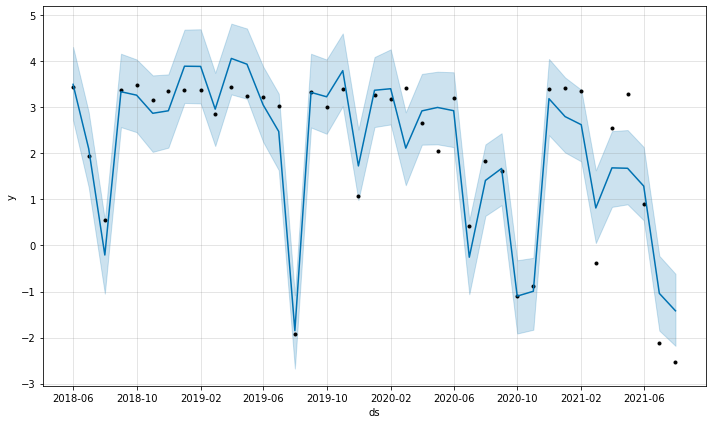

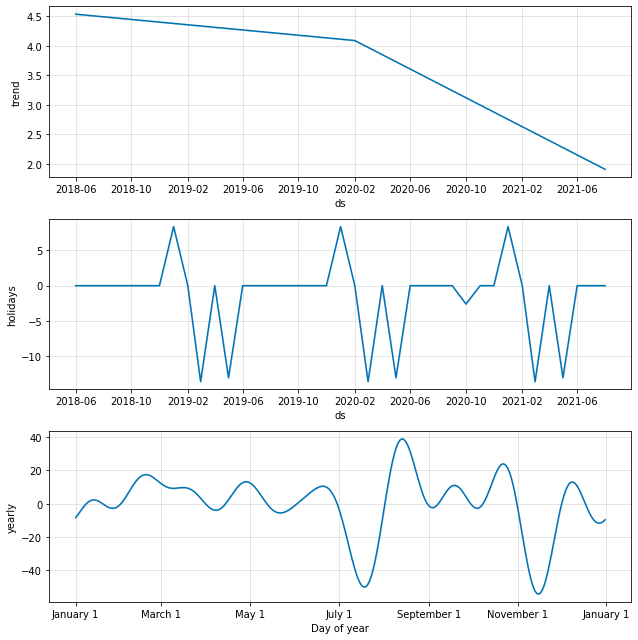

In [ ]:
pred(df_9, 'positive')

### negative

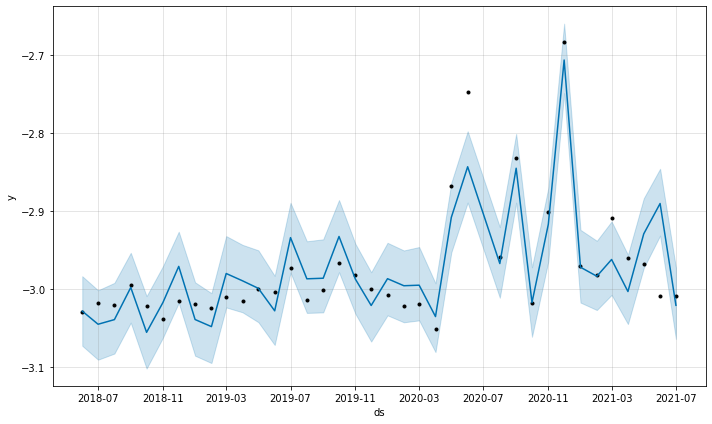

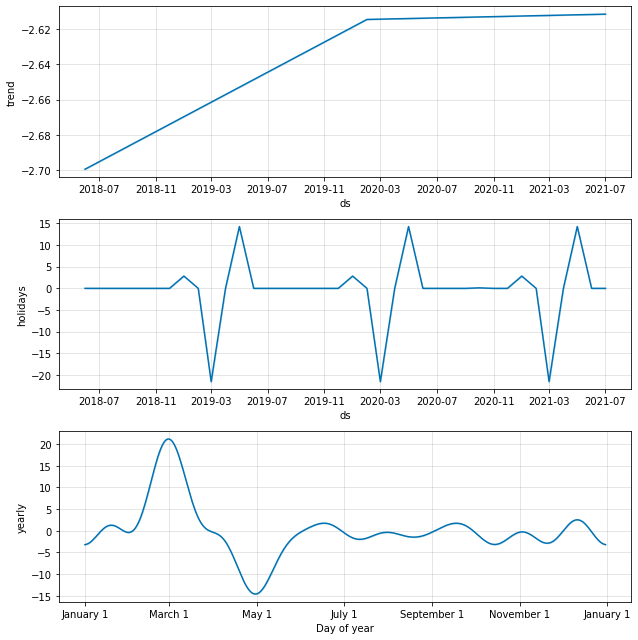

In [ ]:
pred(df_0, 'negative')

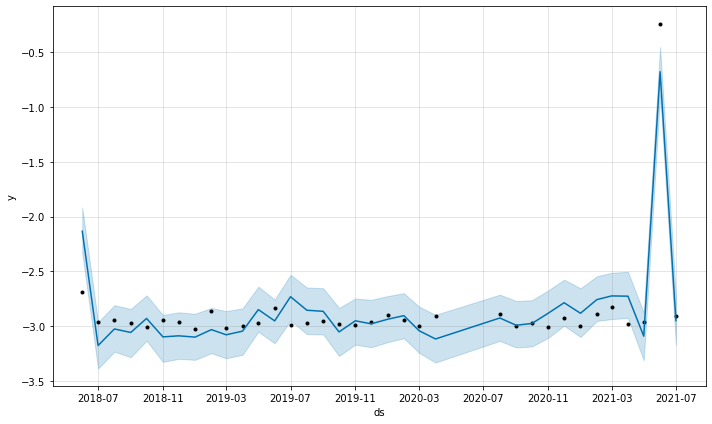

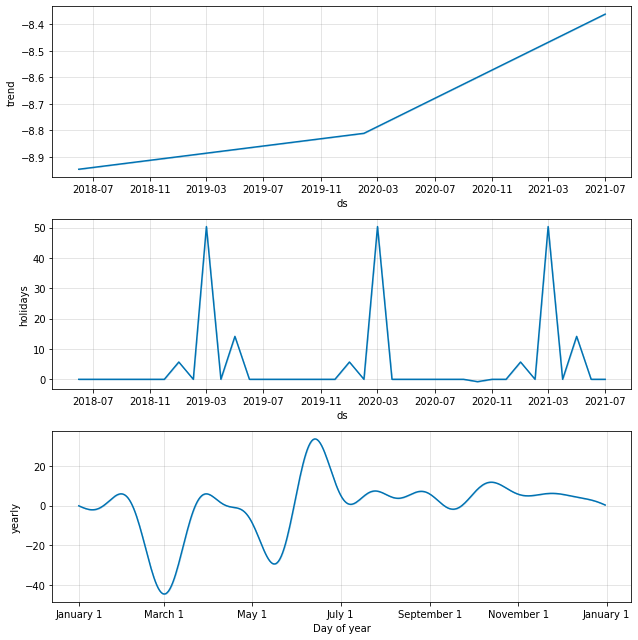

In [ ]:
pred(df_1, 'negative')

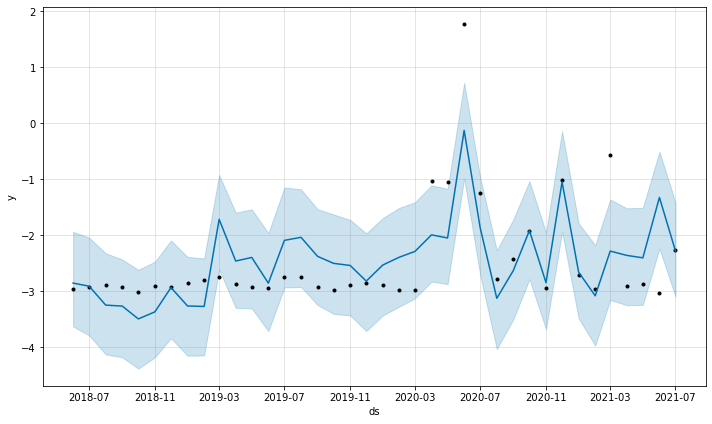

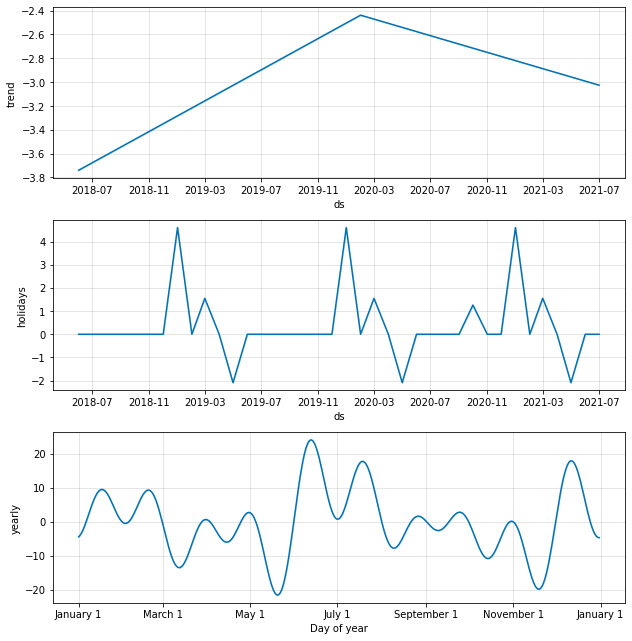

In [ ]:
pred(df_2, 'negative')

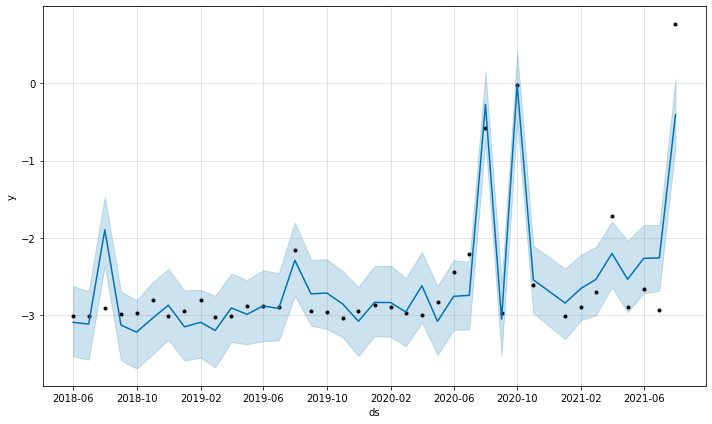

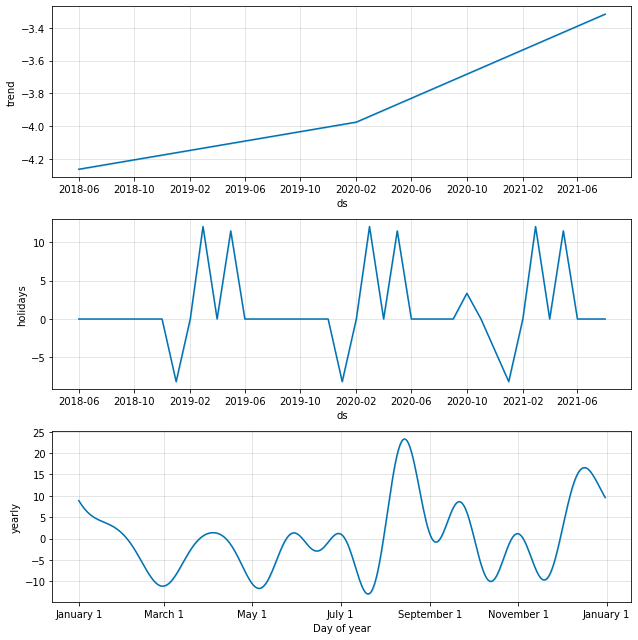

In [ ]:
pred(df_3, 'negative')

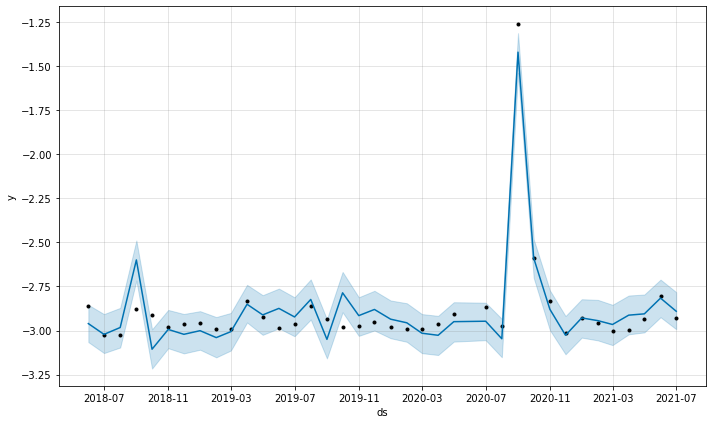

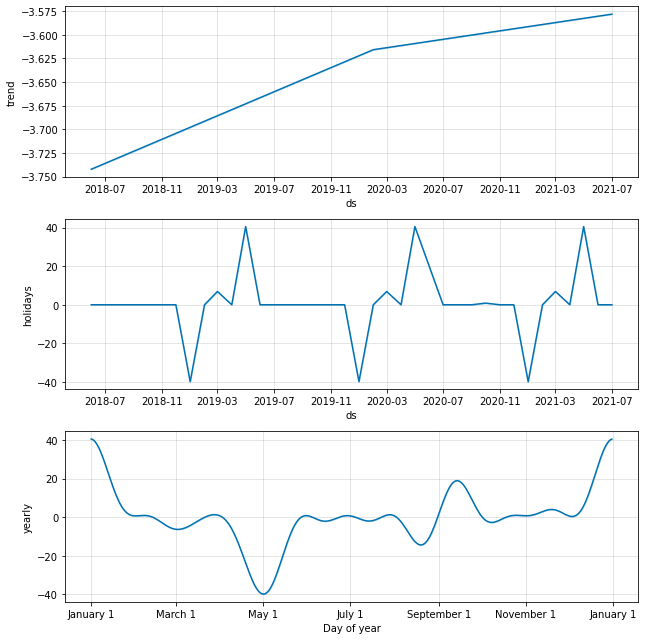

In [ ]:
pred(df_4, 'negative')

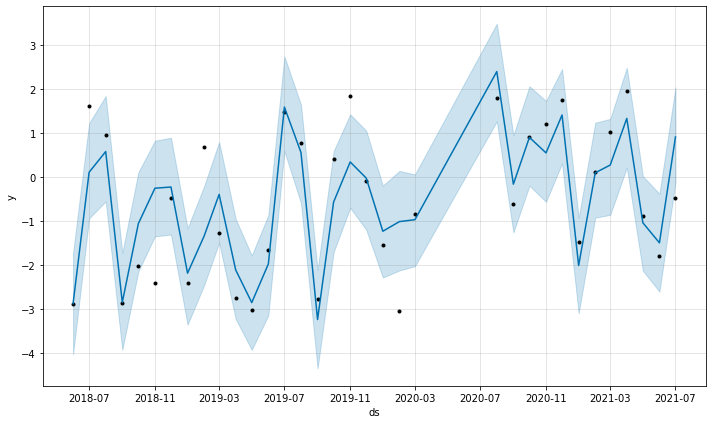

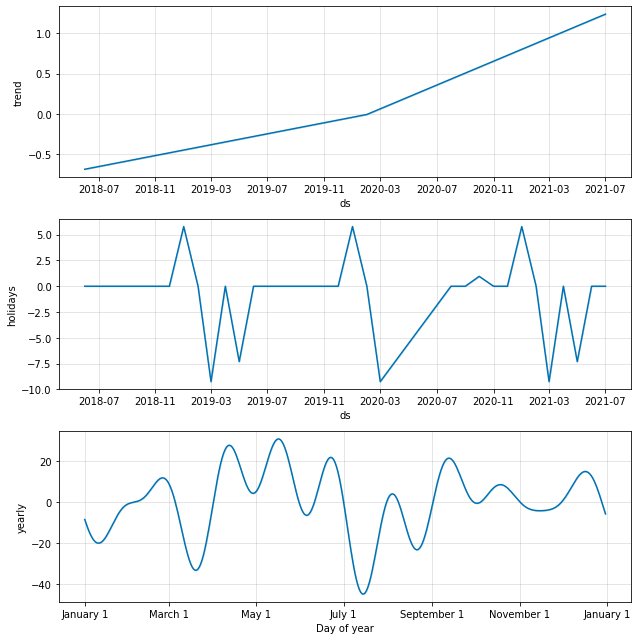

In [ ]:
pred(df_5, 'negative')

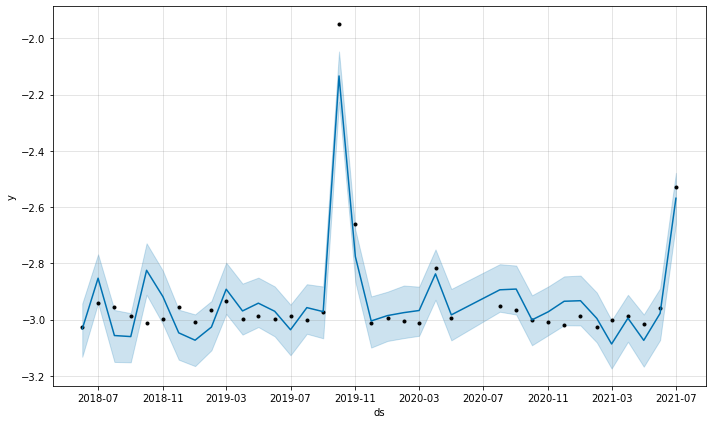

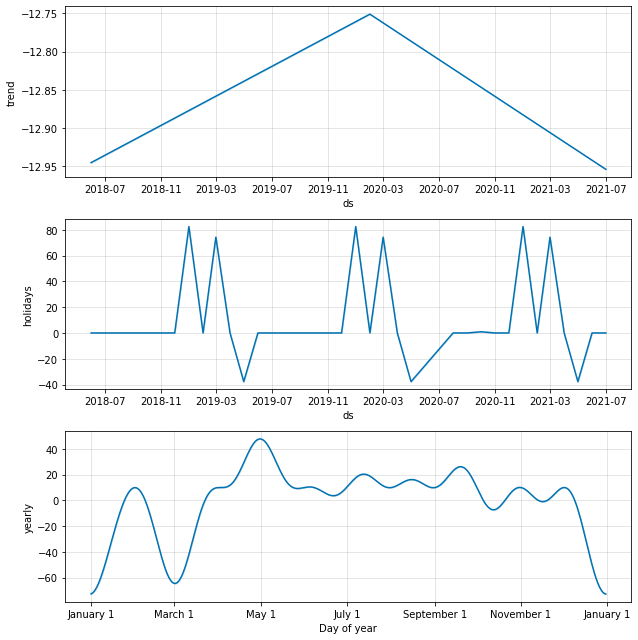

In [ ]:
pred(df_6, 'negative')

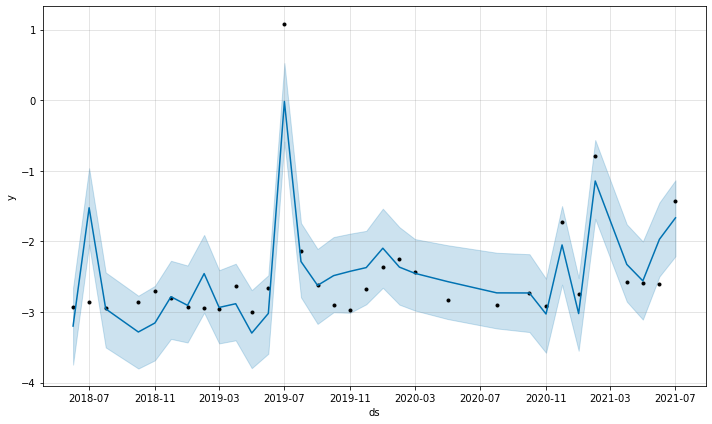

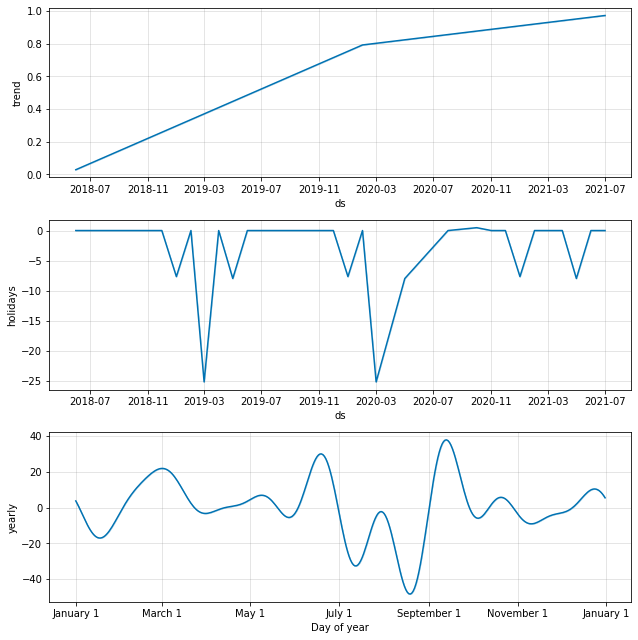

In [ ]:
pred(df_7, 'negative')

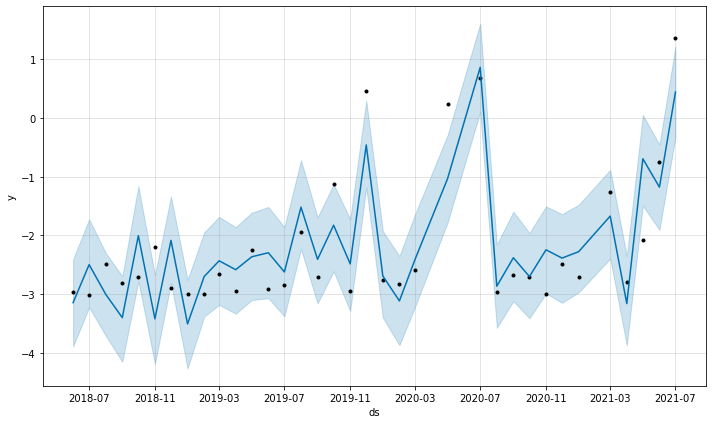

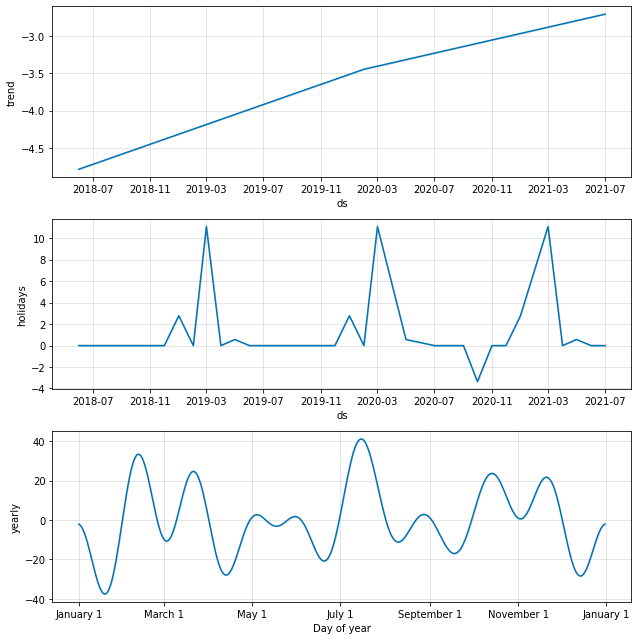

In [ ]:
pred(df_8, 'negative')

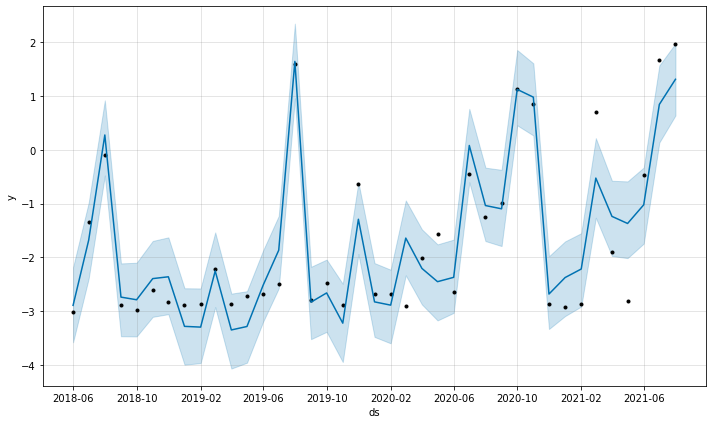

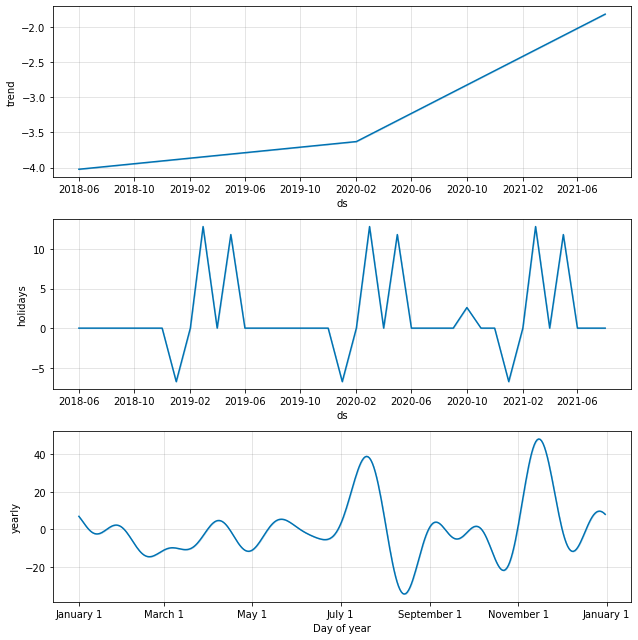

In [ ]:
pred(df_9, 'negative')

In [ ]:
df_0_std = df_0.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')
df_1_std = df_1.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')
df_2_std = df_2.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')
df_3_std = df_3.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')
df_4_std = df_4.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')
df_5_std = df_5.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')
df_6_std = df_6.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')
df_7_std = df_7.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')
df_8_std = df_8.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')
df_9_std = df_9.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='std')

In [ ]:
df_0_std.plot()

In [ ]:
df_1_std.plot()

In [ ]:
df_2_std.plot()

In [ ]:
df_3_std.plot()

In [ ]:
df_4_std.plot()

In [ ]:
df_5_std.plot()

In [ ]:
df_6_std.plot()

In [ ]:
df_9_std.plot()

In [ ]:
df_0_avg = df_0.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='mean')
df_1_avg = df_1.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='median')
df_2_avg = df_2.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='mean')
df_3_avg = df_3.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='mean')
df_4_avg = df_4.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='mean')
df_5_avg = df_5.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='mean')
df_6_avg = df_6.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='mean')
df_7_avg = df_7.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='mean')
df_8_avg = df_8.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='mean')
df_9_avg = df_9.pivot_table(index='stay_date', values='sentimental_score_positive', aggfunc='mean')

In [ ]:
df_0_avg.plot()

In [ ]:
df_0_avg.plot()

In [ ]:
df_1_avg.plot()

In [ ]:
df_2_avg.plot()

In [ ]:
df_3_avg.plot()

In [ ]:
df_4_avg.plot()